In [1]:
import lux
import pandas as pd

In [2]:
df = pd.read_csv("/Users/joshzaragoza/Arizona_Election_Project/Leg_District_4_outcome.csv")

In [3]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df2 = pd.read_csv("/Users/joshzaragoza/Arizona_Election_Project/Resources/Voter Data/Leg_District_4_clean.csv")

In [6]:
df2.count()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df2.dtypes

Party                object
Sex                  object
Age                   int64
Ethnicity            object
Voter Score         float64
Turnout Score       float64
Kids in HH          float64
Liberal Ideology    float64
Zip                   int64
dtype: object


In [8]:
df2.isnull()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
#drop any null or nan in the data frame 
df2.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace=True)

In [10]:
df2.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
df2 = df2.astype({'Voter Score':'int','Turnout Score':'int','Kids in HH':'int','Liberal Ideology':'int'})

In [12]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
import numpy as np

# Create a list of our conditions
conditions = [
    (df2['Voter Score'] <= 34),
    (df2['Voter Score'] >= 35) & (df2['Voter Score'] <= 65),
    (df2['Voter Score'] >= 66) & (df2['Voter Score'] <=100)
    ]

# Create of values we want assigned to the conditions
values = ['False', 'True', 'False']

# Create a new column with np.select to assign values to it using our lists as arguments
df2['Swing Voter'] = np.select(conditions, values)

# Display updated DataFrame
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
# Create a list of our conditions
conditions = [
    (df2['Age'] >= 18) & (df2['Age'] <= 24),
    (df2['Age'] >= 25) & (df2['Age'] <= 34),
    (df2['Age'] >= 35) & (df2['Age'] <=44),
    (df2['Age'] >= 45) & (df2['Age'] <=54),
    (df2['Age'] >= 55) & (df2['Age'] <=64),
    (df2['Age'] >= 65),
    ]

# Create of values we want assigned to the conditions
values = ['18-24', '25-34', '35-44','45-54','55-64','65+']

# Create a new column with np.select to assign values to it using our lists as arguments
df2['Age'] = np.select(conditions, values)

# Display updated DataFrame
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
#Drop columns that doesn't impact Swing Voter chances
df2.drop(columns=["Zip"], inplace=True)
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
# Changing to numerical by label encoder
from sklearn.preprocessing import LabelEncoder 
number = LabelEncoder()
df2["Swing Voter"] = number.fit_transform(df2["Swing Voter"])
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
number = LabelEncoder()
df2["Party"] = number.fit_transform(df2["Party"])
df2["Sex"] = number.fit_transform(df2["Sex"])
df2["Ethnicity"] = number.fit_transform(df2["Ethnicity"])
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
#Drop columns that doesn't impact Swing Voter chances
df2.drop(columns=["Voter Score"], inplace=True)
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [22]:
df2.drop(columns=["Turnout Score","Kids in HH","Liberal Ideology"], inplace=True)
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
df2.drop(columns=["Party","Sex","Ethnicity"], inplace=True)
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
vis = df2.exported[0]
vis

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

In [27]:
print (vis.to_code("matplotlib"))

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'Age': {0: '18-24', 1: '18-24', 2: '25-34', 3: '25-34', 4: '35-44', 5: '35-44', 6: '45-54', 7: '45-54', 8: '55-64', 9: '55-64', 10: '65+', 11: '65+'}, 'Swing Voter': {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1}, 'Record': {0: 916, 1: 162, 2: 8721, 3: 1671, 4: 11162, 5: 2030, 6: 13310, 7: 2088, 8: 16851, 9: 2059, 10: 30963, 11: 2681}})
fig, ax = plt.subplots()
bars = df['Age']
measurements = df['Record']
ax.barh(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],[916, 8721, 11162, 13310, 

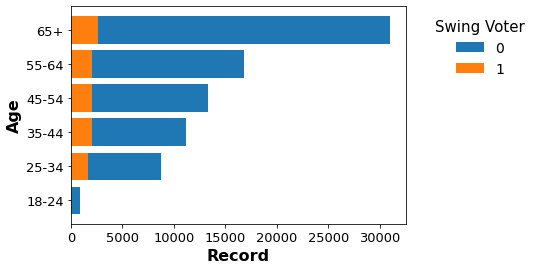

In [28]:
# Print Lux Graph in Matplotlib

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'Age': {0: '18-24', 1: '18-24', 2: '25-34', 3: '25-34', 4: '35-44', 5: '35-44', 6: '45-54', 7: '45-54', 8: '55-64', 9: '55-64', 10: '65+', 11: '65+'}, 'Swing Voter': {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1}, 'Record': {0: 916, 1: 162, 2: 8721, 3: 1671, 4: 11162, 5: 2030, 6: 13310, 7: 2088, 8: 16851, 9: 2059, 10: 30963, 11: 2681}})
fig, ax = plt.subplots()
bars = df['Age']
measurements = df['Record']
ax.barh(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],[916, 8721, 11162, 13310, 16851, 30963], label='0')
ax.barh(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],[162, 1671, 2030, 2088, 2059, 2681], label='1')
ax.legend(title='Swing Voter', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=False)
ax.set_xlabel('Record')
ax.set_ylabel('Age')

fig